## Basic Python Libraries
- Pandas — For data analysis and data manipulation.
- Matplotlib — For data visualization.
- Seaborn — It’s based on matplotlib and provides a high-level interface for data visualization.
- WordCloud — For visualizing text data in the form of clouds.
- re — It provides functions to pre-process the strings as per the given regular expression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud
import re

## Natural Language Processing
- nltk — Natural Language Toolkit is a collection of libraries for natural language processing.
- stopwords — A collection of words that don’t provide any meaning to a sentence.
- WordNetLemmatizer — It is used to convert different forms of words into a single item but still keeping the context intact.

In [2]:
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# import nltk
# nltk.download("stopwords")
# from nltk.corpus import stopwords
# print(stopwords.words("english"))


## Scikit-Learn (Machine Learning Library for Python)
- CountVectorizer — For transforming text into vectors.
- GridSearchCV — For hyperparameter tuning of ML models.
- RandomForestClassifier — Machine learning algorithm for classification.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Evaluation Metrics
- Accuracy Score — It is no. of correctly classified instances/total no. of instances.
- Precision Score —It is the ratio of correctly predicted instances over total positive instances.
- Recall Score — It is the ratio of correctly predicted instances over total instances in that class.
- Roc Curve — A plot of true positive rate against false positive rate.
- Classification Report — Report of precision, recall and f1 score.
- Confusion Matrix — A table used to describe the classification models.

In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [5]:
# !pip install scipy==1.11.4

we will read the training data and validation data. As the data is in text format, separated by semicolons and without column names, we will create the data frame with read_csv() and parameters as “delimiter” and “names” respectively.

In [5]:
df_train = pd.read_csv("train.txt", delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt", delimiter=';',names=['text','label'])

we will be using cross-validation and we have a separate test dataset as well, so we don’t need a separate validation set of data. So, we will concatenate these two Data Frames, and then we will reset the index to avoid duplicate indexes.

In [7]:
# df = pd.concat([df_train,df_val])
# df.reset_index(inplace=True, drop=True)

In [12]:
df = df_train[:2000]

view a sample of the contents of the dataset using the “sample” method of pandas, and check the dimensions using the “shape” method.

In [13]:
print("Shape of the DataFrame:", df.shape)
df.sample(5)

Shape of the DataFrame: (2000, 2)


,text,label
162,i am fatter because the only thing in my life ...,sadness
1432,i took steps and immediately remembered the fe...,sadness
1284,i feel suffocated yet charmed my brain pauses ...,joy
865,i woke up on a beautiful sunday morning feelin...,fear
1325,i enjoy hearing the faith stories of other bel...,sadness


check for the various target labels in our dataset using seaborn.

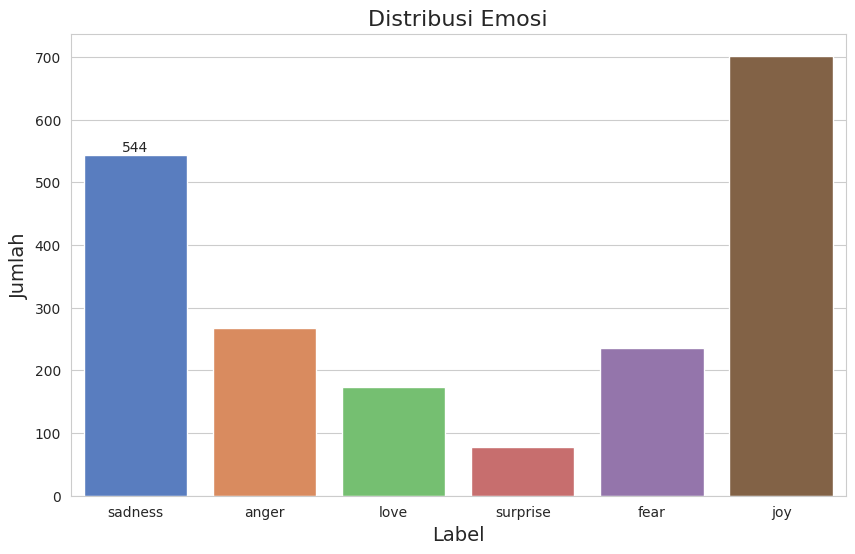

In [14]:
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.set_style("whitegrid")   # Gaya
ax = sns.countplot(data=df, x='label', palette='muted', hue="label")  # Warna "muted" untuk palet

# Menambahkan elemen tambahan
ax.set_title("Distribusi Emosi", fontsize=16)  # Judul
ax.set_xlabel("Label", fontsize=14)  # Label sumbu X
ax.set_ylabel("Jumlah", fontsize=14)  # Label sumbu Y
ax.bar_label(ax.containers[0])  # Menambahkan angka di atas bar

# Tampilkan plot
plt.show()

we have 6 labels or targets in the dataset. We can make a multi-class classifier for Sentiment Analysis. But, for the sake of simplicity, we will merge these labels into two classes, i.e. Positive and Negative sentiment.

- Positive Sentiment — “joy”, ”love”, ”surprise”
- Negative Sentiment — “anger”, ”sadness”, ”fear”

Now, we will create a custom encoder to convert categorical target labels to numerical form, i.e. (0 and 1).

In [15]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])


/tmp/ipykernel_19452/2559021753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="surprise", value =1, inplace=True)
/tmp/ipykernel_19452/2559021753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="love", value =1, inplace=True)
/tmp/ipykernel_19452/2559021753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="joy", value =1, inplace=True)
/tmp/ipykernel_1945

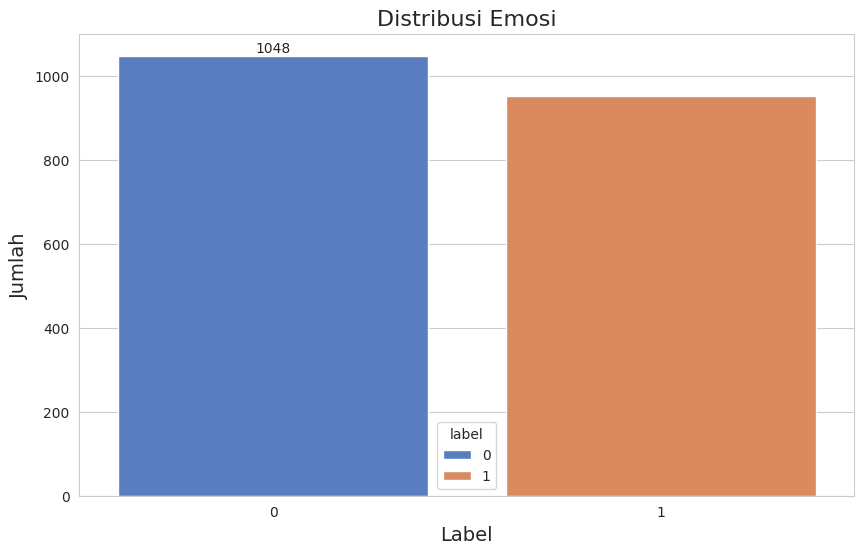

In [16]:
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.set_style("whitegrid")   # Gaya
ax = sns.countplot(data=df, x='label', palette='muted', hue="label")  # Warna "muted" untuk palet

# Menambahkan elemen tambahan
ax.set_title("Distribusi Emosi", fontsize=16)  # Judul
ax.set_xlabel("Label", fontsize=14)  # Label sumbu X
ax.set_ylabel("Jumlah", fontsize=14)  # Label sumbu Y
ax.bar_label(ax.containers[0])  # Menambahkan angka di atas bar

# Tampilkan plot
plt.show()

we can see that our target has changed to 0 and 1,i.e. 0 for Negative and 1 for Positive, and the data is more or less in a balanced state.

Data Pre-processing
Now, we will perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

We will create a function for pre-processing of data.

First, we will iterate through each record, and by using regular expression, we will get rid of any characters apart from alphabets.
Then, we will convert the string to lowercase as the word “Good” is different from the word “good”.
Note — Because, if we don’t convert the string to lowercase, it will cause an issue, when we will create vectors of these words, as two different vectors will be created for the same word, which we don’t want to.

3. Then we will check for stopwords in the data and get rid of them.

Terminology Alert — Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

4. Then, we will perform lemmatization on each word, i.e. change the different forms of a word into a single item called a lemma.

Terminology Alert — A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.

5. And, then we will return a corpus of processed data.

So, first, we will create an object of WordNetLemmatizer and then we will perform the transformation.

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/zaens/nltk_data...


True

In [17]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df['text'])

Now, we will create a Word Cloud.

Terminology Alert — WordCloud is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

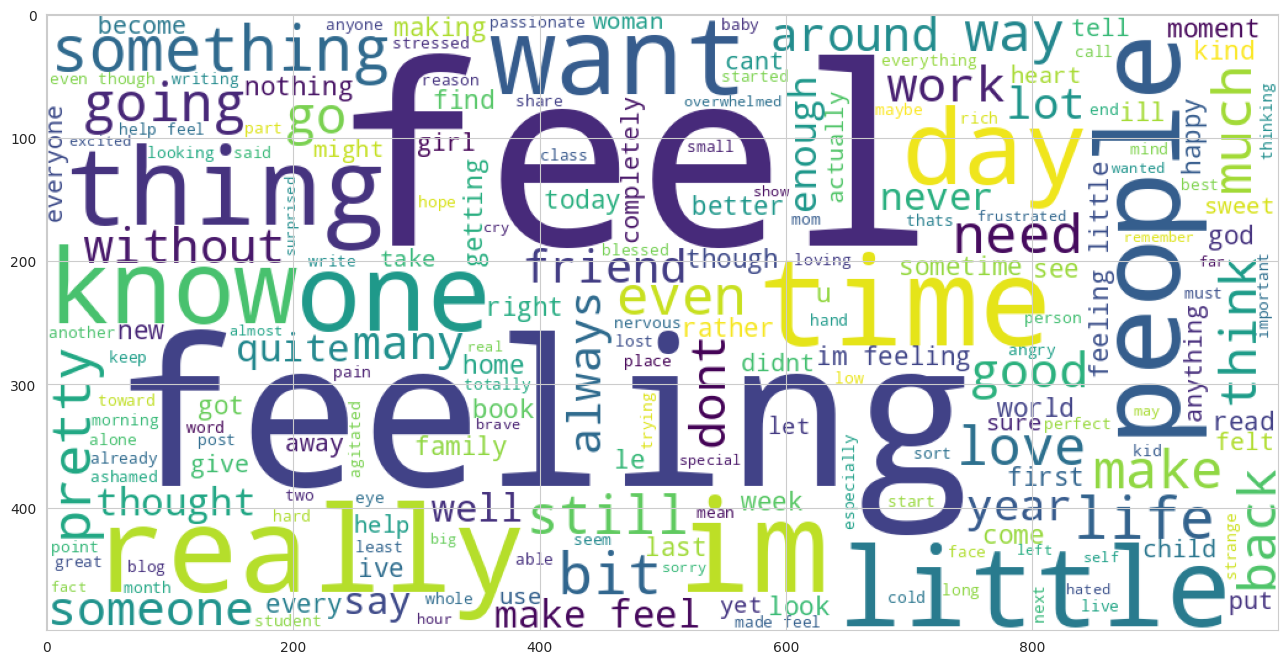

In [18]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

## Bag of Words
Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words, i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity, i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer.

So, we will convert the text data into vectors, by fitting and transforming the corpus that we have created.

In [19]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

We have taken the ngram_range as (1,2) which signifies a bigram.

Terminology Alert — Ngram is a sequence of ’n’ of words in a row or sentence. ‘ngram_range’ is a parameter, which we use to give importance to the combination of words.

For example, the words “social media” together has a different meaning than the words “social” and “media” separately.

We can experiment with the value of the ngram_range parameter and select the option which gives better results

## Model Creation
Now comes the machine learning model creation part and in this project, I’m going to use Random Forest Classifier, and we will tune the hyperparameters using GridSearchCV.

GridSearchCV() is used to fit our estimators on the training data with all possible combinations of the predefined hyperparameters, which we will feed to it and provide us with the best model.

We will provide the following parameters to GridSearchCV,

Estimator or model — RandomForestClassifier in our case.
parameters — A dictionary of hyperparameter names and their values.
cv — It signifies cross-validation folds.
return_train_score — It returns the training scores of the various models.
n_jobs — It signifies the no. of jobs to run parallelly (“-1” signifies that all CPU cores will be used which reduces the training time drastically)
First, We will create a dictionary, “parameters” which will contain the values of different hyperparameters.

We will pass this as a parameter to GridSearchCV to train our random forest classifier model using all possible combinations of these parameters to find the best model.

In [21]:
# parameters = {'max_features': ('auto','sqrt'),
#              'n_estimators': [500, 1000, 1500],
#              'max_depth': [5, 10, None],
#              'min_samples_split': [5, 10, 15],
#              'min_samples_leaf': [1, 2, 5, 10],
#              'bootstrap': [True, False]}
parameters = {
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [100, 200, 300],  # Kurangi jumlah estimator
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

And then, we can view all the models and their respective parameters, mean test score and rank, as GridSearchCV stores all the intermediate results in the cv_results_ attribute.

In [ ]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_esults_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i]) 

Now, we will choose the best parameters obtained from GridSearchCV and create a final random forest classifier model and then train our new model.



In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

## Test Data Transformation
Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.

In [ ]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

## Model Evaluation
We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix and create a roc curve to visualize how our model performed.

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

## Confusion Matrix:

## Roc Curve:
We will find the probability of the class using the predict_proba() method of Random Forest Classifier and then we will plot the roc curve.

In [ ]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our model performed very well in classifying the sentiments, with an Accuracy score, Precision and Recall of approx. 96%. And the roc curve and confusion matrix are great as well which means that our model can classify the labels accurately, with fewer chances of error.

Now, we will check for custom input as well and let our model identify the sentiment of the input statement.

Predict for Custom Input:

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")
# function to take the input statement and perform the same transformations
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Hurray, As we can see that our model accurately classified the sentiments of the two sentences.